# Time Dimension Gaps vs Spatial Experiment

The goal of this experiment is to judge the efficiency of encoding the x-axis as a `spatial` dimension versus `time` dimension.

By `time` dimension we mean leaving gaps (silences) behind sequential data points that correlate linearly in duration to the eucledian distance between the points.

## Methodology

- A set of graphs are sonified using `TOPH` in two distinct ways. The y-axis can either be `constant` or encoded using `pitch`.

- The core idea is to encode the same graph (in y-dimension) with varying gaps between the points in the x-axis, and make the user choose from a random sampling.

In [5]:
    from toph.audio.playable import Chain,SineWave, Silence, Wave
    from toph.audio.effect import SimplePanner
    from toph.audio.stage import AudioStage

    import matplotlib.pyplot as plt

    AUDIO_PATH = "assets/ding.wav"

    def ax_gen(domain, range_):

        do_scale = max(domain) - min(domain)
        ra_scale = max(range_) - min(range_)

        def foo(dp):

            dx = dp - min(domain) 
            sdx = dx / do_scale 
            return min(range_) + sdx * ra_scale 

        return foo

    def sonify(xs, ys, x_mode, y_mode, gaps=0.5, save=None):
        """
        """
        with AudioStage() as stage:

            #TODO: replace with linear axis when implemented

            lin_ax = ax_gen(
                domain=(min(xs), max(xs)),
                range_=(-1. , +1.)
            )

            pitch_ax = ax_gen(
                domain=(min(ys), max(ys)),
                range_=(110, 880)
            )

            x_deltas = [xs[idx+1] - xs[idx] for idx in range(len(xs) - 1)]
            x_deltas.append(0.)

            gap_ax = ax_gen(
                domain=(min(x_deltas), max(x_deltas)),
                range_=(0.25 , 1.25)
            ) 

            marks = []

            for idx, (x , y) in enumerate(zip(xs, ys)):
                
                audio_src = Wave(AUDIO_PATH) if y_mode == "static" else SineWave(vol = 0.85, f = pitch_ax(y), secs=0.5)
                if x_mode == "spatial":

                    marks.extend([
                            audio_src.add_effect(SimplePanner(dir = lin_ax(x))),
                            Silence(secs = gaps)
                    ])

                elif x_mode == "gaps":

                    marks.append(audio_src)
                    if x_deltas[idx] > 0.:
                        marks.append(
                            Silence(secs = gap_ax(x_deltas[idx]))
                            )

            if save:
                stage.save(Chain(*marks), save)

            else:
                stage.play(Chain(*marks))

    def plot_four(datasets, idxs, y_mode, show_correct = None):
        fig, axes = plt.subplots(2, 2, figsize=(8, 8))

        for i, ax in enumerate(axes.flat):
            ax.scatter(datasets[idxs[i]]["x"], datasets[idxs[i]]["y"] if y_mode == "pitch" else [0] * len(datasets[idxs[i]]["x"]))
            ax.set_title(f"Plot {i + 1}")
            ax.grid(True)

            if show_correct is not None:
                for spine in ax.spines.values():
                    if idxs[i] == show_correct:
                            spine.set_linewidth(2)
                            spine.set_color("green")
                    else:
                            spine.set_color("red")


        plt.tight_layout()

In [11]:
datasets = [
    {
        "x":[0, 40, 50, 55, 90],
        "y":[10, 15, 20, 15, 10]
    },
    {
        "x":[0, 20, 40, 60, 80],
        "y":[10, 15, 20, 15, 10]
    },
    {
        "x":[0, 20, 60, 120, 240, 360],
        "y":[20, 15, 20, 15, 10, 5]
    },
    {
        "x": [0, 5, 15, 45, 135 , 405],
        "y": [12, 14, 19, 14, 11, 8]
    },
    {
        "x": [0, 20, 40, 60, 80, 100],
        "y": [15, 20, 25, 20, 15, 10]
    },
    {
        "x": [0, 60, 65, 70, 72, 74],
        "y": [10, 18, 16, 20, 15, 12]
    },
    {
        "x": [0, 2, 4, 8, 10, 90],
        "y": [8, 12, 18, 22, 18, 10]
    },
    {
        "x": [0, 25, 50, 75, 100, 125],
        "y": [20, 18, 22, 18, 14, 10]
    }
]


ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM dsnoop:0
ALSA lib pcm_dmix.c:999:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib pcm_dmix.c:999:(snd_pcm_dmix_open) unable to open slave


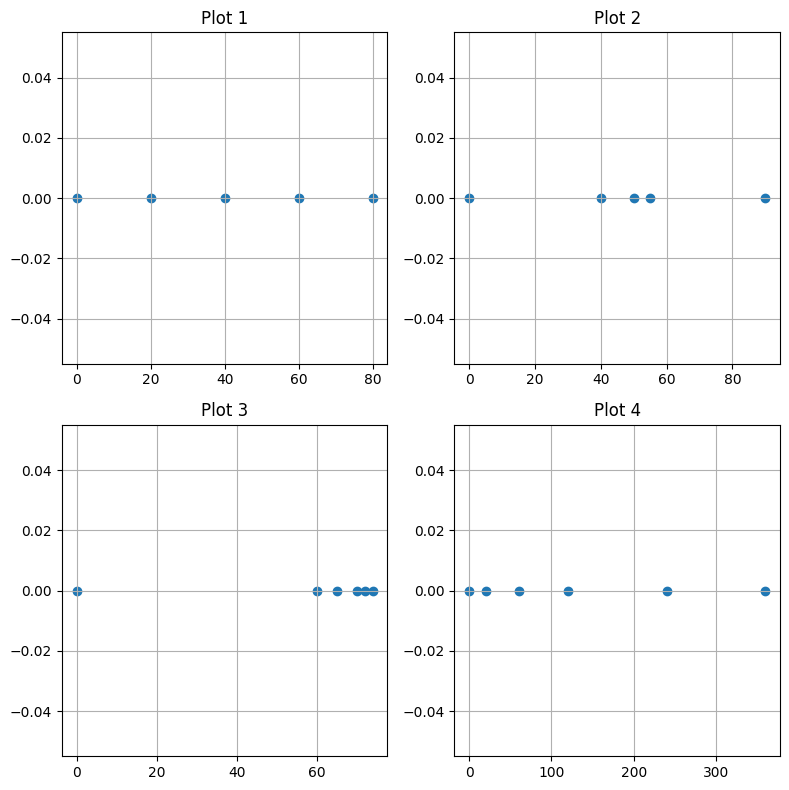

In [12]:
import random

sonify_idxs = random.sample(range(len(datasets)), 4) 

correct_one = sonify_idxs[random.randint(0, len(sonify_idxs) - 1)]
x_mode = "spatial" # gaps , spatial
y_mode = "static" # static , pitch

sonify(datasets[correct_one]["x"],
        datasets[correct_one]["y"],
        x_mode=x_mode,
        y_mode=y_mode,
        save="test_audio.wav"
        )

plot_four(datasets, sonify_idxs, y_mode)

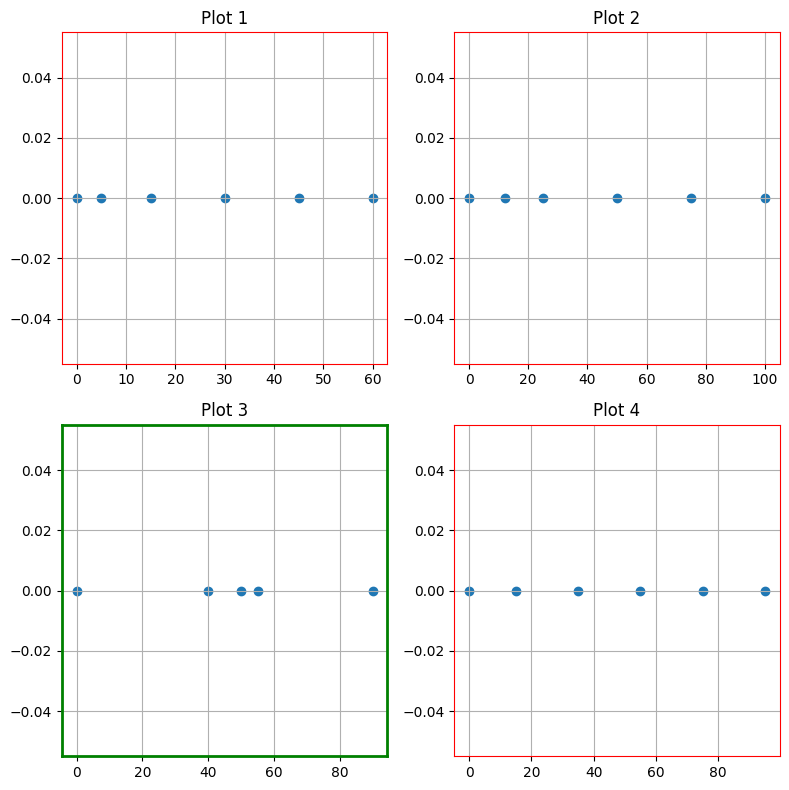

In [9]:
plot_four(datasets , sonify_idxs, y_mode, correct_one)